<a href="https://colab.research.google.com/github/AnovaYoung/SchoolProjects/blob/main/Copy_of_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Stock Prices Using RNN with LSTM**

C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


947/947 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0116
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


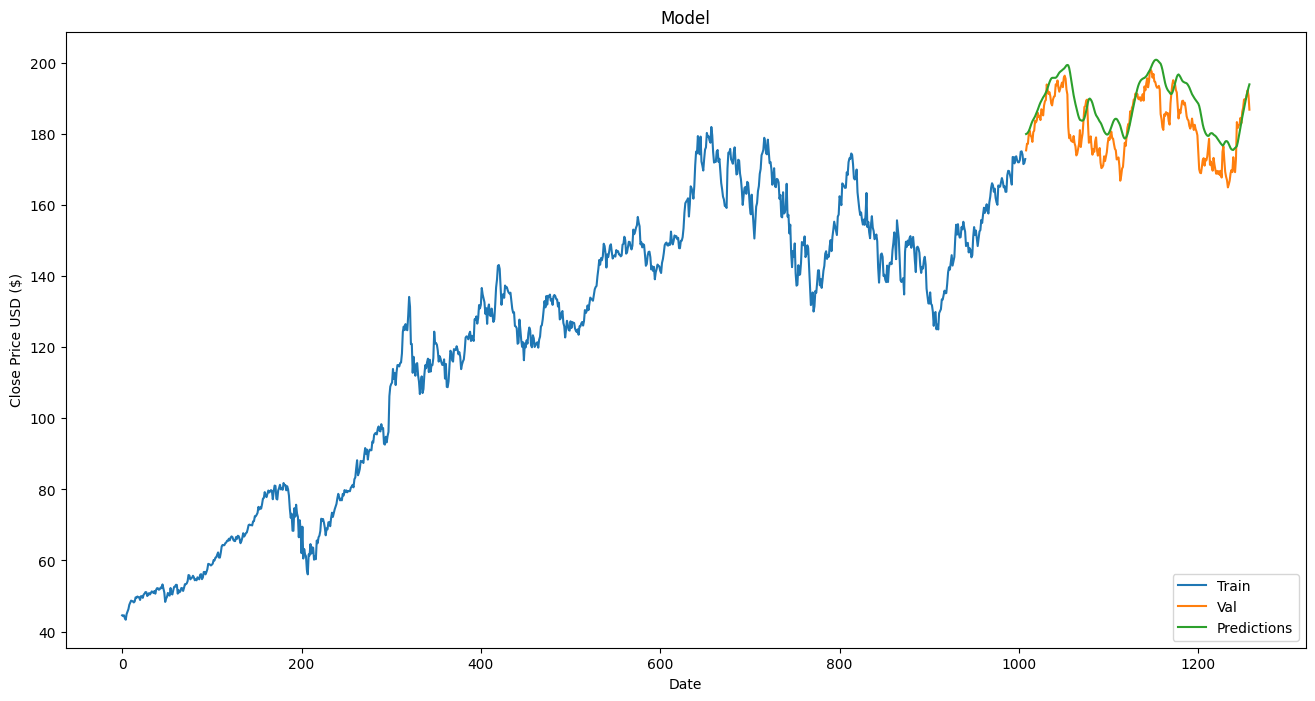

            Date        Open        High         Low       Close   Adj Close  \
1008  2023-05-26  173.320007  175.770004  173.110001  175.429993  174.503250   
1009  2023-05-30  176.960007  178.990005  176.570007  177.300003  176.363388   
1010  2023-05-31  177.330002  179.350006  176.759995  177.250000  176.313660   
1011  2023-06-01  177.699997  180.119995  176.929993  180.089996  179.138626   
1012  2023-06-02  181.029999  181.779999  179.259995  180.949997  179.994080   
...          ...         ...         ...         ...         ...         ...   
1253  2024-05-17  189.509995  190.809998  189.179993  189.869995  189.869995   
1254  2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
1255  2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
1256  2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
1257  2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   

        Volume  Predictions  
1008  548

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

file_path = "C:\\Users\\manov\\Downloads\\M3-AAPL\\M3-AAPL.csv"
df = pd.read_csv(file_path)

# 'Close' price for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train
def create_dataset(dataset, time_step=60):
    x, y = [], []
    for i in range(len(dataset) - time_step - 1):
        x.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

# Prepare test set
test_data = scaled_data[training_data_len - time_step:, :]
x_test, y_test = create_dataset(test_data, time_step)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# predictions on test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Ensure the lengths match (this was an issue)
valid = df[training_data_len:]
valid = valid.iloc[:len(predictions)]
valid['Predictions'] = predictions

# visualize the results
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'][:training_data_len], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Valid')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Print the valid and prediction data
print(valid)

# Save the model
model.save("stock_price_prediction_model.h5")


Now lets build a LSTM model with some changes, including a different optimizer, a different evaluation metric (Mean Absolute Percentage Error), and some tweaks to the model architecture and training parameters. Also for visualizations I'm going to incorporate Candlesticks.  

In [ ]:
!pip install mplfinance


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\manov\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import mplfinance as mpf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import MeanAbsolutePercentageError

# The following code is essentially the same as the above code
file_path = "C:\\Users\\manov\\Downloads\\M3-AAPL\\M3-AAPL.csv"
df = pd.read_csv(file_path)

data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

def create_dataset(dataset, time_step=60):
    x, y = [], []
    for i in range(len(dataset) - time_step - 1):
        x.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)


model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=50))
model.add(Dense(units=1))

# Compile the model but this time with RMSprop optimizer and MAPE as the metric
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsolutePercentageError()])

model.fit(x_train, y_train, batch_size=32, epochs=10)

test_data = scaled_data[training_data_len - time_step:, :]
x_test, y_test = create_dataset(test_data, time_step)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


Epoch 1/10


C:\Users\manov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0575 - mean_absolute_percentage_error: 35.2060
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_percentage_error: 19.0299
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_percentage_error: 17.5223
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0078 - mean_absolute_percentage_error: 14.3872
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0054 - mean_absolute_percentage_error: 12.2977
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - mean_absolute_percentage_error: 14.8524
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_percentage_error: 11.5255
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0066 - mean_absolute_percentage_error: 11.7826
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0048 - mean_absolute_percentage_error: 10.9975
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


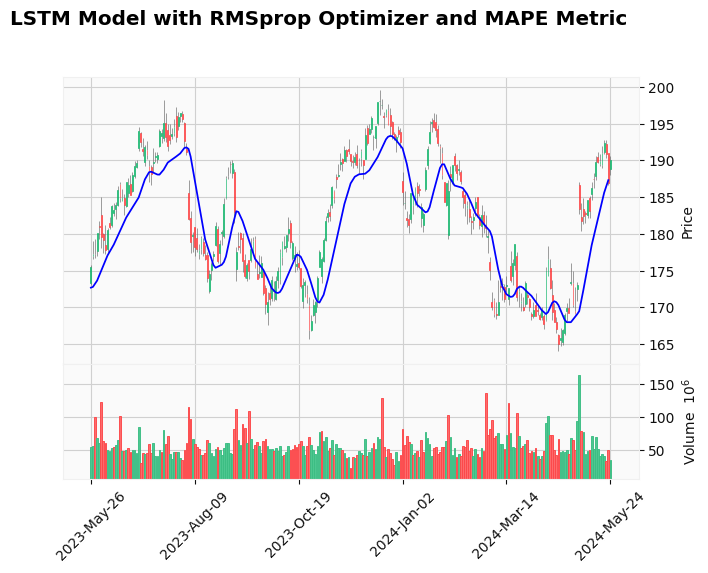

            Date        Open        High         Low       Close   Adj Close  \
1008  2023-05-26  173.320007  175.770004  173.110001  175.429993  174.503250   
1009  2023-05-30  176.960007  178.990005  176.570007  177.300003  176.363388   
1010  2023-05-31  177.330002  179.350006  176.759995  177.250000  176.313660   
1011  2023-06-01  177.699997  180.119995  176.929993  180.089996  179.138626   
1012  2023-06-02  181.029999  181.779999  179.259995  180.949997  179.994080   
...          ...         ...         ...         ...         ...         ...   
1253  2024-05-17  189.509995  190.809998  189.179993  189.869995  189.869995   
1254  2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
1255  2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
1256  2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
1257  2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   

        Volume  Predictions  
1008  548

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# lengths matching issue code again
valid = df[training_data_len:].copy()
valid = valid.iloc[:len(predictions)]
valid['Predictions'] = predictions

# Create a new df for visuals
visual_df = df[training_data_len:].copy()
visual_df['Predictions'] = np.nan
visual_df.iloc[:len(predictions), visual_df.columns.get_loc('Predictions')] = predictions[:, 0]

# Set the Date as index
visual_df.index = pd.to_datetime(visual_df['Date'])

# Create candlestick plot
mpf.plot(visual_df, type='candle', volume=True, style='yahoo',
        title='LSTM Model with RMSprop Optimizer and MAPE Metric',
        ylabel='Price',
        addplot=mpf.make_addplot(visual_df['Predictions'], color='blue'))

# Print both valid and prediction sets
print(valid)
